In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
#5, 10, 15, 30, 40, 50 количество элементов в выборках
# после генерации выборок сделать прошлую лабу, построить график с доверетильенвм интервалом, мат ожидание, ср.кв. откл.
#minVal maxVal нужны просто для проверки, что попало в интервал, но ваще не обязательно
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html



In [3]:
def Norm(x, m, s):
    return (1 / ((2 * math.pi) ** 0.5 * s)) * math.e ** ((-1 / 2) * ((x - m) / (s)) ** 2)


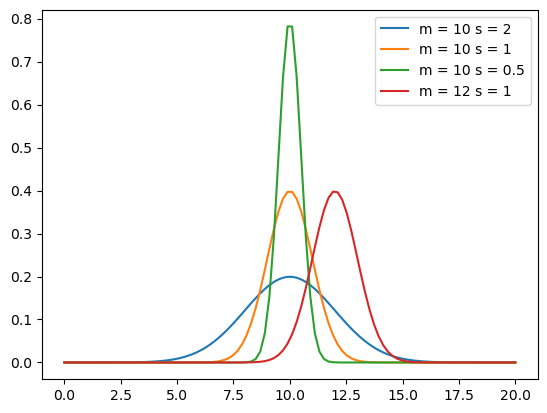

In [4]:
M = [10, 10, 10, 12]
S = [2, 1, 0.5, 1]
l = []
for i in range(len(M)):
    X = np.linspace(0, 20, 100)
    y = []
    for x in X:
        y.append(Norm(x, M[i], S[i]))
    plt.plot(X, y)
    l.append("m = " + str(M[i]) + " s = " + str(S[i]))
plt.legend(l)
plt.show()

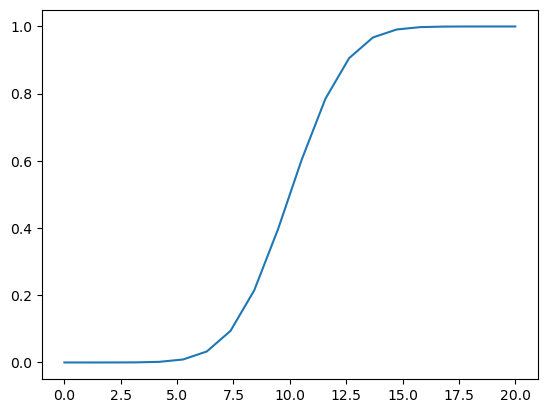

In [5]:
x = np.linspace(0, 20, 20)
y = []
for x_i in x:
    result = integrate.quad(Norm, -np.inf, x_i, args=(10, 2))
    y.append(result[0])
plt.plot(x, y)
plt.show()

In [6]:
#находим X при заданной вероятности по функции распределения, передается IFunc
def GetArg(F, minArg, maxArg, Value, eps):
    while abs((maxArg - minArg) / (maxArg)) > eps:
        midArg = (minArg + maxArg) / 2
        #берем вероятность из функции распр.
        midVal = F(midArg)
        if midVal > Value:
            maxArg = midArg
        else:
            minArg = midArg
    return (minArg + maxArg) / 2

In [7]:
def GetTabF(F, minArg, maxArg, pointsCount):
    YTab = []
    XTab = []
    #находим вероятности по мин и макс аргументу
    minVal = F(minArg)
    maxVal = F(maxArg)
    dVal = (maxVal - minVal) / (pointsCount - 1)
    YTab.append(minVal)
    XTab.append(minArg)
    for i in range(1, pointsCount - 1):
        YTab.append(minVal + dVal * i)
        XTab.append(GetArg(F, minArg, maxArg, YTab[i], 10**-15))
    YTab.append(maxVal)
    XTab.append(maxArg)
    return [XTab, YTab]

In [8]:
def NormIntegrate(x):
    return integrate.quad(Norm, -np.inf, x, args=(10, 2))[0]


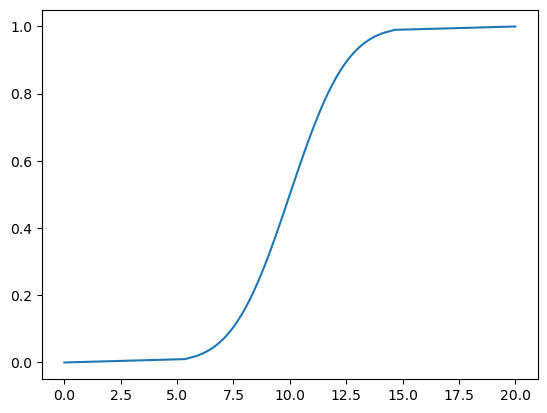

In [9]:
min_a = 0
max_a = 20
tabSize = 101
tab_XY = GetTabF(NormIntegrate, min_a, max_a, tabSize)
plt.plot(tab_XY[0], tab_XY[1])
plt.show() 

In [10]:
def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:
            y = ((p - YTab[i]) / (YTab[i-1] - YTab[i])) * XTab[i-1] + ((p - YTab[i-1]) / (YTab[i] - YTab[i-1])) * XTab[i]
            return y

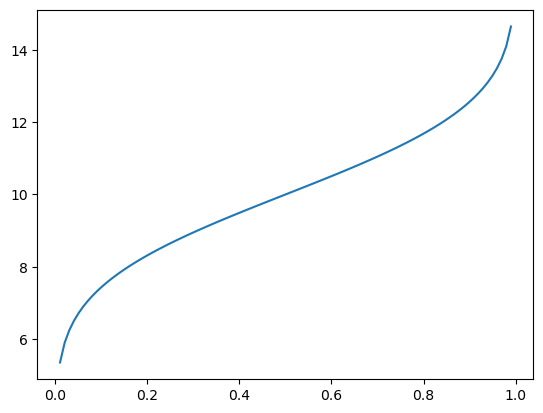

In [11]:
p = np.linspace(0, 1, 100)
y = []
for p_i in p:
    y.append(Model_N(tab_XY[0], tab_XY[1], p_i))
plt.plot(p, y)
plt.show()

In [25]:
p = []
nums = []
for i in range(10**5):
    p = random.random()
    num = Model_N(tab_XY[0], tab_XY[1], p)
    if(num != None):
        nums.append(num)

In [22]:
def get_freq(nums, a, b, k):
    freq = [0] * (k + 1)
    step = (b - a) / k
    x = []
    first_elem = a
    while first_elem <= b:
        x.append(first_elem)
        first_elem += step
    if(len(x) < len(freq) and x[-1] < b):
        x.append(b)
    for num in nums:
        for i in range(len(x) - 1):
            if x[i] <= num < x[i+1]:
                freq[i] += 1
                break
    freq = [x / len(nums) for x in freq]
    print(sum(freq))
    return [freq, x]

0.99999


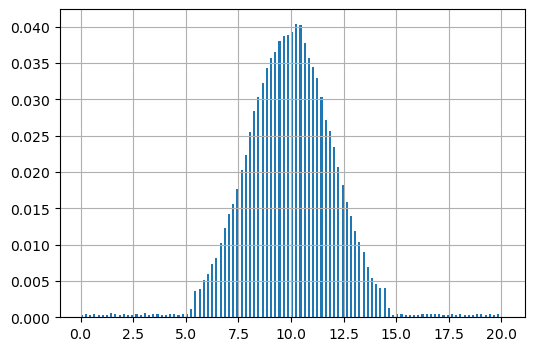

In [26]:
arr = get_freq(nums, min(nums), max(nums), 100)
x = arr[1]
y = arr[0]
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.bar(x, y, align='edge', width=0.1)
ax.grid()